In [48]:
using MolecularGraph, Test, MetaGraphs, Graphs
include(joinpath(pwd(), "src", "RWK.jl"))

Main.RWK

# molecule A

In [49]:
mol_a = smilestomol("C(C=O)F") # Fluoroacetaldehyde

GraphMol{SmilesAtom, SmilesBond}([Dict(3 => 4, 1 => 2), Dict(2 => 3, 1 => 1), Dict(2 => 2), Dict(3 => 1)], [(1, 2), (2, 3), (1, 4)], SmilesAtom[SmilesAtom(:C, 0, 1, nothing, false, :unspecified), SmilesAtom(:C, 0, 1, nothing, false, :unspecified), SmilesAtom(:O, 0, 1, nothing, false, :unspecified), SmilesAtom(:F, 0, 1, nothing, false, :unspecified)], SmilesBond[SmilesBond(1, false, :unspecified, :unspecified), SmilesBond(2, false, :unspecified, :unspecified), SmilesBond(1, false, :unspecified, :unspecified)], Dict{Symbol, Any}(), Dict{Symbol, Any}())

In [50]:
atomsymbol(mol_a)

4-element Vector{Symbol}:
 :C
 :C
 :O
 :F

In [51]:
mol_a.edges

3-element Vector{Tuple{Int64, Int64}}:
 (1, 2)
 (2, 3)
 (1, 4)

In [52]:
bondorder(mol_a)

3-element Vector{Int64}:
 1
 2
 1

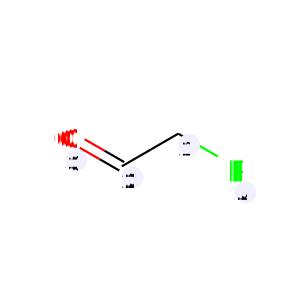

In [53]:
canvas = SvgCanvas()
draw2d!(canvas, mol_a)
drawatomindex!(canvas, mol_a)
mol_a_svg = tosvg(canvas, 300, 300)
display("image/svg+xml", mol_a_svg)

# molecule B

In [54]:
mol_b = smilestomol("C(C(=O)O)F") # Fluoroacetic acid

GraphMol{SmilesAtom, SmilesBond}([Dict(4 => 5, 1 => 2), Dict(2 => 3, 3 => 4, 1 => 1), Dict(2 => 2), Dict(3 => 2), Dict(4 => 1)], [(1, 2), (2, 3), (2, 4), (1, 5)], SmilesAtom[SmilesAtom(:C, 0, 1, nothing, false, :unspecified), SmilesAtom(:C, 0, 1, nothing, false, :unspecified), SmilesAtom(:O, 0, 1, nothing, false, :unspecified), SmilesAtom(:O, 0, 1, nothing, false, :unspecified), SmilesAtom(:F, 0, 1, nothing, false, :unspecified)], SmilesBond[SmilesBond(1, false, :unspecified, :unspecified), SmilesBond(2, false, :unspecified, :unspecified), SmilesBond(1, false, :unspecified, :unspecified), SmilesBond(1, false, :unspecified, :unspecified)], Dict{Symbol, Any}(), Dict{Symbol, Any}())

In [55]:
atomsymbol(mol_b)

5-element Vector{Symbol}:
 :C
 :C
 :O
 :O
 :F

In [56]:
mol_b.edges

4-element Vector{Tuple{Int64, Int64}}:
 (1, 2)
 (2, 3)
 (2, 4)
 (1, 5)

In [57]:
bondorder(mol_b)

4-element Vector{Int64}:
 1
 2
 1
 1

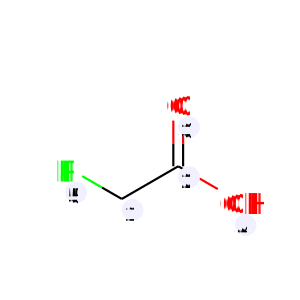

In [58]:
canvas = SvgCanvas()
draw2d!(canvas, mol_b)
drawatomindex!(canvas, mol_b)
mol_b_svg = tosvg(canvas, 300, 300)
display("image/svg+xml", mol_b_svg)

# Direct Product Graph AxB

In [69]:
dpg = RWK.direct_product_graph(mol_a, mol_b, store_vertex_pair=true)

{7, 4} undirected Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)

In [70]:
# generate a metagraph of axb manually
axb = MetaGraph(7)
# add vertex label
vertex_pair_vecotr = [(1,1), (1,2), (2,1), (2,2), (3,3), (3,4), (4,5)]
for i = 1:7
    set_props!(axb, i, Dict(:vertex_pair => vertex_pair_vecotr[i]))
end
axb_edges = [(1,4), (1,7), (2,3), (4,5)]
for (v₁, v₂) in axb_edges
    add_edge!(axb, v₁, v₂)
end

In [74]:
@test dpg == axb

Test Passed
  Expression: dpg == axb
   Evaluated: {7, 4} undirected Int64 metagraph with Float64 weights defined by :weight (default weight 1.0) == {7, 4} undirected Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)

In [72]:
for v in vertices(dpg)
	println("v ", " prop = ", get_prop(dpg, v, :vertex_pair))
end

v  prop = (1, 1)
v  prop = (1, 2)
v  prop = (2, 1)
v  prop = (2, 2)
v  prop = (3, 3)
v  prop = (3, 4)
v  prop = (4, 5)


In [73]:
for ed in edges(dpg)
    println("edge between ", ed.src, " and ", ed.dst)
    println("\tvertex ", ed.src, " vertex pair = ", 
        get_prop(dpg, ed.src, :vertex_pair))
    println("\tvertex ", ed.dst, " vertex pair = ", 
        get_prop(dpg, ed.dst, :vertex_pair))
end

edge between 1 and 4
	vertex 1 vertex pair = (1, 1)
	vertex 4 vertex pair = (2, 2)
edge between 1 and 7
	vertex 1 vertex pair = (1, 1)
	vertex 7 vertex pair = (4, 5)
edge between 2 and 3
	vertex 2 vertex pair = (1, 2)
	vertex 3 vertex pair = (2, 1)
edge between 4 and 5
	vertex 4 vertex pair = (2, 2)
	vertex 5 vertex pair = (3, 3)
